In [ ]:

# from google.colab import files 
# uploaded = files.upload()
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np

In [ ]:
BATCH_SIZE= 32
IMAGE_SIZE= 256
CHANNELS=3
EPOCHS=50
input_shape= (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/gdrive/MyDrive/NSFW_AI",shuffle
                                                              =True,image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                              batch_size=BATCH_SIZE)

Found 2164 files belonging to 2 classes.


In [ ]:
class_names= dataset.class_names
class_names

['Normal', 'Semi_Nude']

(32, 256, 256, 3)
[1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0]


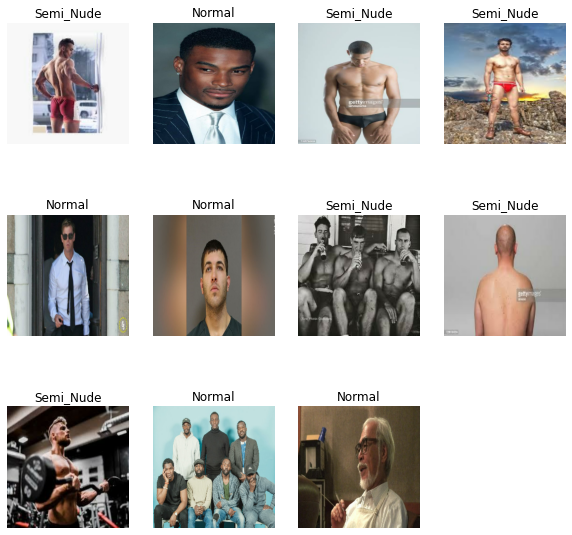

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(11):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_part(ds,train_split=0.8,val_split=0.1,test_split=0.1,shufffle=True):
    assert(train_split+val_split+test_split)==1
    ds_size= len(ds)
    train_size= int(train_split*ds_size)
    val_size= int(val_split*ds_size)
    
    train_ds= ds.take(train_size)
    val_ds= ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

# Train-Test Splitting 

---



In [ ]:

train_size=0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds,val_ds,test_ds= get_dataset_part(dataset)
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [ ]:

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
n_classes=5
model = models.Sequential([resize_and_rescale,
                  data_augmentation,
                  layers.Conv2D(32,kernel_size= (3,3),activation='relu',input_shape=input_shape),
                 layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,(3,3),activation='relu'),
                 layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,(3,3),activation='relu'),
                 layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,kernel_size= (3,3),activation='relu'),
                 layers.MaxPooling2D((2,2)),
                   layers.Flatten(),
                   layers.Dense(64,activation='relu'),
                   layers.Dense(n_classes,activation='softmax')
                 ])
model.build(input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy']
             )

In [ ]:
history = model.fit(train_ds,batch_size=BATCH_SIZE,validation_data=val_ds,verbose=1,
                   epochs=50)

Epoch 1/50
54/54 [==============================] - 3s 59ms/step - loss: 0.5422 - accuracy: 0.7274 - val_loss: 0.6799 - val_accuracy: 0.6875
Epoch 2/50
54/54 [==============================] - 3s 58ms/step - loss: 0.5277 - accuracy: 0.7361 - val_loss: 0.7800 - val_accuracy: 0.6667
Epoch 3/50
54/54 [==============================] - 3s 58ms/step - loss: 0.5380 - accuracy: 0.7286 - val_loss: 0.6932 - val_accuracy: 0.6719
Epoch 4/50
54/54 [==============================] - 3s 60ms/step - loss: 0.5103 - accuracy: 0.7459 - val_loss: 0.6907 - val_accuracy: 0.7031
Epoch 5/50
54/54 [==============================] - 3s 58ms/step - loss: 0.5104 - accuracy: 0.7488 - val_loss: 0.7416 - val_accuracy: 0.6302
Epoch 6/50
54/54 [==============================] - 3s 59ms/step - loss: 0.5172 - accuracy: 0.7425 - val_loss: 0.6145 - val_accuracy: 0.7292
Epoch 7/50
54/54 [==============================] - 3s 59ms/step - loss: 0.4800 - accuracy: 0.7679 - val_loss: 0.6434 - val_accuracy: 0.7240
Epoch 8/50
54

In [ ]:
model.evaluate(test_ds)

8/8 [==============================] - 0s 26ms/step - loss: 0.4426 - accuracy: 0.8197


[0.44255170226097107, 0.8196721076965332]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Actual Label :  Semi_Nude
Predicted Label :  Semi_Nude


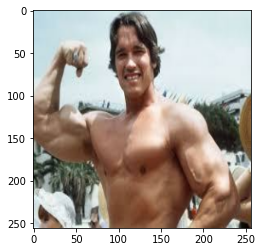

In [ ]:
for image_batch,labels_batch in dataset.take(1):
    img= image_batch[0].numpy().astype("uint8")
    label=labels_batch[0].numpy()
    plt.imshow(img)
    print("Actual Label : ",class_names[labels_batch[0].numpy()])
    
    batch_prediction= model.predict(image_batch)
    print("Predicted Label : ",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


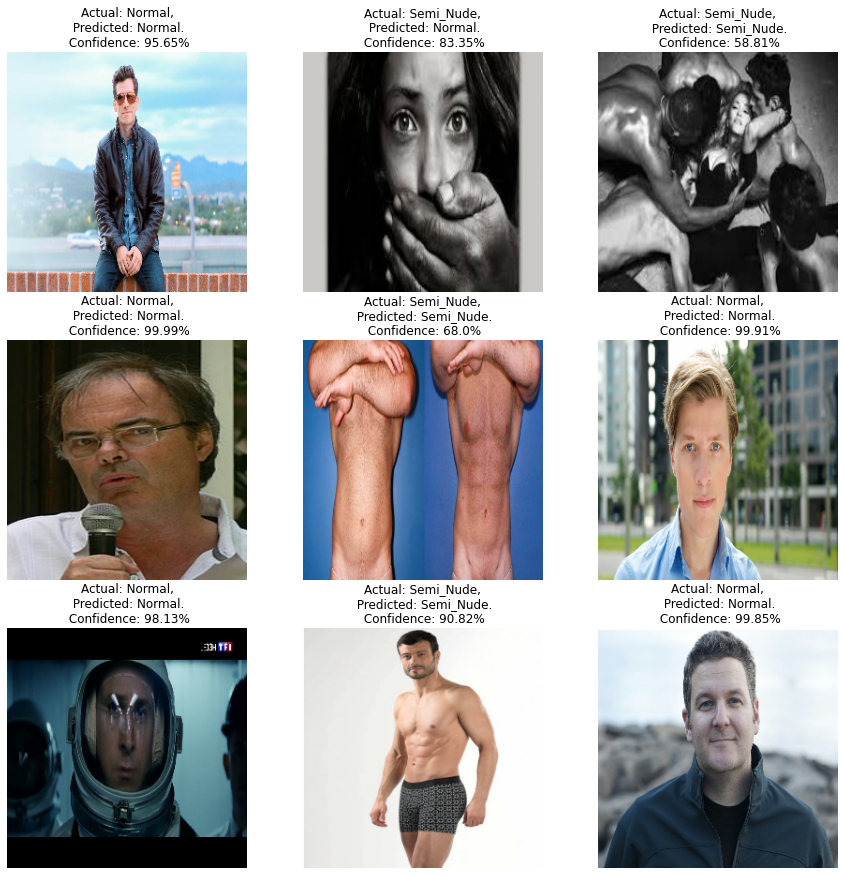

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(19):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:

model.save("./nsfw_AI.h5")

In [ ]:
MODEL= tf.keras.models.load_model("/content/nsfw_AI.h5")
CLASS_NAMES =["Normal","Semi_Nude"]
# import torch
from keras.preprocessing import image

def predict(imag):
    
    img_array = tf.keras.preprocessing.image.img_to_array(imag)
    img_array = tf.expand_dims(img_array, 0)

    predictions = MODEL.predict(img_array)

    predicted_class = CLASS_NAMES[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence



imag = '/content/demo.jpg'
# img = image.load_img(imag, target_size=(256, 256))

img = image.load_img(imag,color_mode='rgb', target_size=(256, 256))
img_array = image.img_to_array(img)
# img = image.load_img(imag, target_size=(256, 256))
# img_batch = np.expand_dims(imag, axis=0)
predict(img_array)
# print(a)
# print(image.shape)
